In [1]:
%matplotlib inline
import numpy as np
import sklearn.cluster
import sklearn.feature_extraction
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
# Generate a random data matrix. n = number of data points; m = length of each data point; num_types = number of types
def gen_data(n, m, num_types):
    # type for each data point (each from 0 to n-1)
    types = np.trunc(np.random.random_sample(n)*num_types)
    # list of random vectors of m integers between 20 and 40, to serve as the mean for each type
    means = [np.random.randint(20,40,m) for t in range(num_types)]
    # list of vectors of standard deviations for each type
    stddevs = 2 * np.ones([num_types,m])
    # generate a data matrix and round to the nearest thousandth
    return np.round(map(lambda t : list(np.random.randn(len(means[t])) * stddevs[t] + means[t]), map(int, types)),3)

In [3]:
# run k-means clustering on M, for each k values in k_vals
def k_mean_test(M, k_vals):
    results = []
    # sum of squared Euclidean distances from mean
    var = sum(np.var(M,0))*len(M)
    # loop through all k values provided
    for k in k_vals:
        # fit k-means clusterer
        fit = sklearn.cluster.KMeans(n_clusters=k).fit(M)
        # sum of squared Euclidean distance from cluster center
        within_var = sum(map(lambda r : min(r)**2, fit.transform(M)))
        results.append((fit, k, within_var/var))
    return results

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0.99999999999999956, 0.50108324493184819, 0.16819114649030564, 0.12933941580081831, 0.10025777876088444, 0.09394033720861053, 0.089096087550106229, 0.083069258147858885, 0.078501181076039039, 0.07564579107754206]]
Wall time: 350 ms


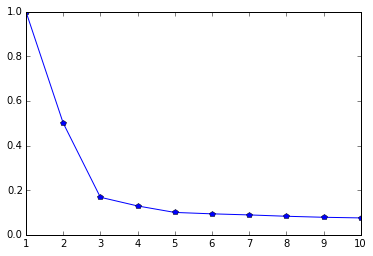

In [7]:
%%time
# generate 200 data points in R^4, with 5 topics
M = gen_data(200, 4, 5)
# plot results for k=1 to 10
results = k_mean_test(M, range(1,11))
plot_results = map(list, zip(*[(b,c) for a,b,c in results]))
print plot_results
plt.plot(plot_results[0], plot_results[1], 'p-')

In [11]:
%%time
# read in data from csv
noun_train_mat = np.loadtxt("noun_train_mat.csv", delimiter = ",")
# use TF-IDF to scale each document's vector to have norm 1 and place a lower weight on very common words
tf_idf_fit = sklearn.feature_extraction.text.TfidfTransformer().fit(noun_train_mat)
noun_train_mat = tf_idf_fit.transform(noun_train_mat).toarray()

Wall time: 32.7 s


In [25]:
%%time
var = sum(np.var(noun_train_mat,0))*len(noun_train_mat)
kmeans_fit = sklearn.cluster.KMeans(n_clusters=14).fit(noun_train_mat)
within_var = sum(map(lambda r : min(r)**2, kmeans_fit.transform(noun_train_mat)))
#results.append((k, within_var/var))

#plot_results = map(list, zip(*k_mean_test(M, range(1,21))))
#print plot_results
#plt.plot(plot_results[0], plot_results[1], 'p-')

Wall time: 20.5 s


In [36]:
%%time
# use the fit above to cluster the data
clusters = kmeans_fit.predict(noun_train_mat)
cluster_lists = [[i for i,j in enumerate(clusters) if j==cluster] for cluster in range(14)]
print 'Number of documents per cluster:', [len(clusters[clusters==i]) for i in range(14)]
# uncomment this loop to see a list of documents by cluster
#for cluster in range(14):
#    print
#    print 'Documents in category %s:' % cluster, cluster_lists[cluster]

Number of documents per cluster: [43, 289, 111, 115, 24, 37, 77, 12, 49, 188, 88, 42, 19, 57]
Wall time: 91 ms


In [42]:
%%time
# read in test data from csv
noun_test_mat = np.loadtxt("noun_test_mat.csv", delimiter = ",")
# use TF-IDF to scale each document's vector to have norm 1 and place a lower weight on very common words
noun_test_mat = tf_idf_fit.transform(noun_test_mat).toarray()

Wall time: 11.5 s


In [63]:
%%time
# use NMF fit from training data to cluster test observations
clusters_test = kmeans_fit.predict(noun_test_mat)
cluster_lists_test = [[i for i,j in enumerate(clusters_test) if j==cluster] for cluster in range(14)]
print 'Number of documents per cluster:', [len(clusters_test[clusters_test==i]) for i in range(14)]
# uncomment this loop to see a list of documents by cluster
#for cluster in range(14):
#    print
#    print 'Documents in category %s:' % cluster, cluster_lists_test[cluster]

Number of documents per cluster: [16, 141, 41, 39, 8, 15, 21, 5, 17, 82, 32, 9, 3, 15]
Wall time: 44 ms
